## Homework 4

### Question 1: K-Means Clustering

In [93]:
# setup and import data
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

df = pd.read_csv('Desktop/Code/cisc6930_dm/data/segment.csv', sep = ',')

In [94]:
# z-score standardization for clustering 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

df_std = df.iloc[:,1:20]
y = df[['class']]

scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(df_std)
X = pd.DataFrame(x_scaled, columns = df_std.columns)
X.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,1.276189,0.949736,0.0,2.410668,-0.194552,-0.393061,-0.115120,-0.363952,-0.130944,0.591541,0.560193,0.713137,0.469693,-0.765452,1.296479,-1.429044,0.701072,-0.472693,-0.438610
1,-0.163336,0.114538,0.0,-0.357047,-0.194552,-0.598950,-0.121739,-0.579445,-0.133992,-0.947458,-0.936970,-0.956668,-0.936122,0.865568,-0.838573,0.552826,-0.992297,2.510764,-0.492138
2,1.056833,-1.434058,0.0,-0.357047,-0.194552,-0.351882,-0.110113,-0.363952,-0.122759,2.252805,2.257194,2.196563,2.291130,-1.792025,1.472504,-0.697872,2.205432,-0.996872,-0.606487
3,-1.273827,0.862737,0.0,-0.357047,-0.194552,-0.063639,-0.087601,1.821759,-0.025412,0.171373,0.192248,0.199941,0.115183,0.050061,0.331163,-0.611285,0.180634,-0.700863,-0.411626
4,-0.876244,1.280336,0.0,-0.357047,-0.194552,-0.166585,-0.093539,0.051641,-0.107455,0.328573,0.325468,0.399093,0.243541,-0.295331,0.740002,-0.957632,0.382596,-0.543100,-0.426778


In [95]:
# k-means function
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances_argmin_min

def k_means(X, k):
    
    # 1. intialization 
    centroid_list = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328, 1160, 108, 422, 88, 105, 261, 212, 1941, 1724, 704, 1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168, 566, 1812, 214, 53, 423, 50, 705, 1284, 1356, 996, 1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424, 1790, 633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1, 371, 758, 332, 542, 672, 483, 65, 92, 400, 1079, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954, 1818, 1679, 832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425, 610, 1353, 1772, 908, 1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121, 1740, 287, 1383, 1923, 1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233, 1846, 1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643, 1692, 1389, 120, 1034, 805, 266, 339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178, 774, 1623, 1641, 661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356, 541, 1455, 741, 583, 1464, 209, 1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148, 1697, 1785, 298, 1485, 945, 1097, 207, 857, 1758, 1390, 172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427, 1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628, 167, 1042, 1887, 1825, 249, 240, 524, 1098, 311, 337, 220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 613, 152, 1440, 473, 1834, 1387, 1656, 1028, 1106, 829, 1591, 1699, 1674, 947, 77, 468, 997, 611, 1776, 123, 979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442, 1588, 1033, 79, 1686, 854, 257, 1460, 1380, 495, 1701, 1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737, 1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]
    sse_list = []
    
    # ran k-means 25 times with different starting positions
    for c in range(25):  
        i = centroid_list[(c*k):((c+1)*k)]
        centers = X.loc[i]
        
        iteration = 1
        
        # 2. EM algorithm for k-means 
        while True:
            
#             print("\nIteration #", iteration)
            iteration = iteration + 1     
            
            # 2a. Assign labels based on closest center
            labels = pairwise_distances_argmin(X, centers) # return the center/row of y that is closet to X
        
            # 2b. for each label, get the mean of this cluster as new centers
            # mean(0) take the mean of each column
            new_centers = np.array([X[labels == i].mean(0) for i in range(k)])
        
            # 2c. Check for convergence
            if np.all(centers == new_centers) or iteration>50:
                break
            centers = new_centers
            
        # 3. Calcuate SSE  for each of the 25 runs 
        sse = sum(pairwise_distances_argmin_min(X, centers)[1]**2)
        sse_list.append(sse)

        # 4. compute the mean SSE 
        msse = np.mean(sse_list)
        std_sse = np.std(sse_list)
        
    return sse_list, msse, std_sse


### Problem (a) 

For each k = 1,2,...,12 compute the mean SSE, which we denote μk and the sample standard deviation of SSE, which we denote σk, over all 25 clustering runs for that value of k. 

Generate a line plot of the mean SSE (μk) as a function of k. Include error bars that indicate the 95% confidence interval: (μk − 2σk to μk +2σk).

In [74]:
sse_k = {}
std_k = []

for i in range(2, 13):
    sse_list, msse, std_sse = k_means(X, k = i)
    sse_k[i] = msse
    std_k.append(float(std_sse))


In [98]:
ksse = pd.DataFrame.from_dict(sse_k, orient='index')
ksse['std'] = pd.Series(std_k).values
ksse.columns = ['msse', 'std']
ksse

,msse,std
2,7106.497780,255.976837
3,6317.294706,263.974050
4,5736.049454,377.272991
5,5373.420011,283.665170
6,5095.033741,177.738232
7,4873.331962,80.219490
8,4675.163746,100.939727
9,4544.732848,78.424063
10,4376.710832,86.887824
11,4243.947798,103.787472


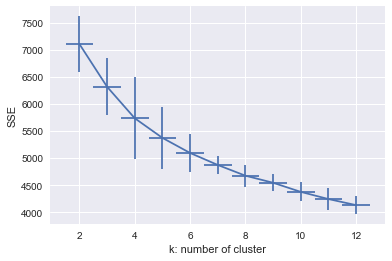

In [103]:
plt.figure()
# plt.plot(list(sse_k.keys()), list(sse_k.values()))
plt.errorbar(list(sse_k.keys()), list(sse_k.values()), xerr=0.5, yerr=2*np.array(std_k))
plt.xlabel("k: number of cluster")
plt.ylabel("SSE")
plt.show()

### Problem (b)

Produce a table containing the 4 columns: k, μk, μk − 2σk and μk + 2σk for each of the values of k = 1,2,...,12.

In [99]:
ksse['mu-2std'] = ksse['msse']-2*ksse['std']
ksse['mu+2std'] = ksse['msse']+2*ksse['std']
ksse.reset_index(level=0, inplace=True)

table = ksse.drop('std', 1)
table.columns = ['k', 'msse', 'mu-2std', 'mu+2std']

table

,k,msse,mu-2std,mu+2std
0,2,7106.497780,6594.544107,7618.451454
1,3,6317.294706,5789.346605,6845.242807
2,4,5736.049454,4981.503472,6490.595437
3,5,5373.420011,4806.089671,5940.750350
4,6,5095.033741,4739.557276,5450.510206
5,7,4873.331962,4712.892982,5033.770943
6,8,4675.163746,4473.284293,4877.043200
7,9,4544.732848,4387.884723,4701.580973
8,10,4376.710832,4202.935184,4550.486481
9,11,4243.947798,4036.372853,4451.522743


### Problem (c) 

As k increases and approaches the total number of examples N, what value does the SSE approach? What problems does this cause in terms of using SSE to choose an optimal k?

### Answer:

As k increases and approaches N, SSE would approach 0. In the extreme case, when the number of clusters k equals the total number of examples N, the SSE will be 0, since there will be no differences/distance between the centroid of the clusters to the data point. 

This leads to the problem that if we choose k based on minimizing SSE, will be eventually get a very large k value that may not best represent the clusters within the data. 


### Problem (d) 

Can you suggest another measure of cluster compactness and separation that might be more useful than SSE?

### Answer: 

1) Another measure that might be more useful than SSE is sihouette analysis. It measures how close each point in one clusters is to points in the neighboring clusters with a range of [-1, 1]

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. 

A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


2) We can also use gap statistics.

Gap statistics aims to standardize the comparision of the log of the normalized sum of squares with a null reference distribution of the data. 

Optimal K is obtained at when the log of the normalized SSM falls the farthest below the reference curve. 

## Question 2: Hierarchical Clustering 

### (a) Build a dendrogram using the single-link, bottom-up approach


In [104]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

In [105]:
data = [0, 4, 5, 20, 25, 39, 43, 44]
ctys = [[0, 4, 5, 20, 25, 39, 43, 44]]

df = pd.DataFrame(data, index=ctys)
pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

,0,4,5,20,25,39,43,44
0,0.0,4.0,5.0,20.0,25.0,39.0,43.0,44.0
4,4.0,0.0,1.0,16.0,21.0,35.0,39.0,40.0
5,5.0,1.0,0.0,15.0,20.0,34.0,38.0,39.0
20,20.0,16.0,15.0,0.0,5.0,19.0,23.0,24.0
25,25.0,21.0,20.0,5.0,0.0,14.0,18.0,19.0
39,39.0,35.0,34.0,19.0,14.0,0.0,4.0,5.0
43,43.0,39.0,38.0,23.0,18.0,4.0,0.0,1.0
44,44.0,40.0,39.0,24.0,19.0,5.0,1.0,0.0


In [131]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([0, 4, 5, 20, 25, 39, 43, 44]).reshape(-1, 1)

clustering = AgglomerativeClustering(linkage='single').fit(X)
clustering 

clustering.labels_

array([1, 1, 1, 0, 0, 0, 0, 0])

{'color_list': ['g', 'g', 'r', 'r', 'c', 'b', 'b'],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 4.0, 4.0, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 4.0, 4.0, 1.0],
  [0.0, 5.0, 5.0, 0.0],
  [4.0, 14.0, 14.0, 5.0],
  [4.0, 15.0, 15.0, 14.0]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25]],
 'ivl': ['0', '1', '2', '5', '6', '7', '3', '4'],
 'leaves': [0, 1, 2, 5, 6, 7, 3, 4]}

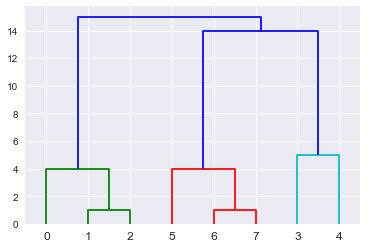

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = np.array([0, 4, 5, 20, 25, 39, 43, 44]).reshape(-1, 1)

Z = linkage(X, method='single', metric='euclidean')

dendrogram(Z, get_leaves=True)

## Question 4: DBSCAN

### (a) List the clusters in terms of their points 



In [137]:
data2 = [(0, 0), (1, 2), (1, 6), (2, 3), (3, 4), (5, 1), (4, 2), (5, 3), (6, 2), (7, 4)]
ctys2 = [(0, 0), (1, 2), (1, 6), (2, 3), (3, 4), (5, 1), (4, 2), (5, 3), (6, 2), (7, 4)]

df2 = pd.DataFrame(data2, index=ctys2)
pd.DataFrame(distance_matrix(df2.values, df2.values), index=df2.index, columns=df2.index)

,"(0, 0)","(1, 2)","(1, 6)","(2, 3)","(3, 4)","(5, 1)","(4, 2)","(5, 3)","(6, 2)","(7, 4)"
"(0, 0)",0.000000,2.236068,6.082763,3.605551,5.000000,5.099020,4.472136,5.830952,6.324555,8.062258
"(1, 2)",2.236068,0.000000,4.000000,1.414214,2.828427,4.123106,3.000000,4.123106,5.000000,6.324555
"(1, 6)",6.082763,4.000000,0.000000,3.162278,2.828427,6.403124,5.000000,5.000000,6.403124,6.324555
"(2, 3)",3.605551,1.414214,3.162278,0.000000,1.414214,3.605551,2.236068,3.000000,4.123106,5.099020
"(3, 4)",5.000000,2.828427,2.828427,1.414214,0.000000,3.605551,2.236068,2.236068,3.605551,4.000000
"(5, 1)",5.099020,4.123106,6.403124,3.605551,3.605551,0.000000,1.414214,2.000000,1.414214,3.605551
"(4, 2)",4.472136,3.000000,5.000000,2.236068,2.236068,1.414214,0.000000,1.414214,2.000000,3.605551
"(5, 3)",5.830952,4.123106,5.000000,3.000000,2.236068,2.000000,1.414214,0.000000,1.414214,2.236068
"(6, 2)",6.324555,5.000000,6.403124,4.123106,3.605551,1.414214,2.000000,1.414214,0.000000,2.236068
"(7, 4)",8.062258,6.324555,6.324555,5.099020,4.000000,3.605551,3.605551,2.236068,2.236068,0.000000


In [138]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

X = np.array([(0, 0), (1, 2), (1, 6), (2, 3), (3, 4), (5, 1), (4, 2), (5, 3), (6, 2), (7, 4)])
a = np.sqrt(2)

db = DBSCAN(eps=a, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [139]:
# Number of clusters in labels, ignoring noise if present.

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

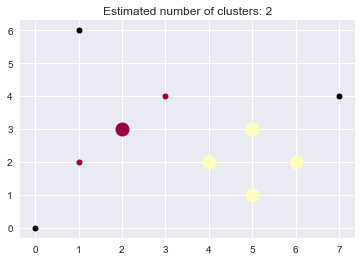

In [140]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()